# Dataset Description

Dataset Information :
This dataset contains information on default payments, demographic factors, credit data, history of payment,
and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Dataset: "'credit-card-default.csv'"

Problem statement: to predict whether a given customer defaults or not. 
Credit default is one of the most important problems in the banking and risk analytics industry. 
There are various attributes which can be used to predict default, such as 
demographic data (age, income, employment status, etc.), 
(credit) behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.).

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)

(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,...... 8=payment delay for eight months, 
9=payment delay for nine months and above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

defaulted: Default payment (1=yes, 0=no)

target variable: ‘defaulted’


# It is a Binary Classification Problem :
    
    Where we have to predict categorical class labels such as 'yes' or 'no' , '+ve' or '-ve' , 'pass' or 'fail' etc
    
    The Goal is to classify whether the client is default or not.

# Steps Involved In Machine Learning:

Step 1 : Import Required Packages.

Step 2 : Loading data and Create a dataframe having our data.

Step 3 : Create separate series for target variable or dependent variable: 'defaulted'.

Step 4 : Create separate series for unique_id variable : 'ID'.

Step 5 : Remove unique_id(ID) from our dataframe.

Step 6 : Create separate numerical dataframe for numerical columns(int64,float64 dtypes) and categorical dataframe for categorical columns(object ddtypes).

Step 7 : Identify columns with  missing values and their count.

Step 8 : If more than 50% missing values present in any columns ,then remove that column or remove missing values rows.

Step 9 : Handling the null / missing values using imputation.

Step 10: Perform Encoding on categorical data.

Step 11: Split the data into train and test datasets.

Step 12: Perfor Recursive Feature Elimination.

Step 13: Choose and Train the model.

Step 14: Evaluate the model.

Step 15: Tune model parameters for improved performance.

Step 16: Make Predictions.

# Import Required Packages

In [212]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
from plotly import tools
import plotly.express as px

import squarify # for tree maps
%matplotlib notebook

init_notebook_mode(connected=True)

In [213]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# PreProcessing Steps

In [214]:
credit_data = pd.read_csv("credit-card-default.csv")
df=pd.read_csv("credit-card-default.csv") 

In [215]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [216]:
credit_data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [217]:
credit_data.shape

(30000, 25)

The Credit Card Default dataset had 30000 observations with 25 variables. 

Out of the 25 variables, there exists one target variable defaulted with possible outcomes Yes and No. 

The other 24 variables are independent variables but one, that was, ID which denotes the id of each client or the identification number of each client.

In [218]:
credit_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaulted'],
      dtype='object')


# Checking the datatypes of each variable

In [219]:
credit_data.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
defaulted    int64
dtype: object

In [220]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [221]:
target=credit_data['defaulted']

# Identifying Missing Values

In [222]:
credit_data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

In [223]:
credit_data['defaulted'].value_counts()

defaulted
0    23364
1     6636
Name: count, dtype: int64

In [224]:
credit_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [225]:
print("No.of unique values for Target variable 'defaulted' : ",credit_data['defaulted'].nunique())
print("The unique values are : ",credit_data['defaulted'].unique())

No.of unique values for Target variable 'defaulted' :  2
The unique values are :  [1 0]


Here
1 indicates "Yes"        0 indicates "No"

# Checking the number of unique values in each column

In [226]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


@interact(feature=credit_data.columns.to_list())
def describe_features(feature):
    print ("Number of unique values in {} column are {} \n The unique values are {}".format(feature, len(credit_data[feature].unique()),credit_data[feature].unique()))

    
    

interactive(children=(Dropdown(description='feature', options=('ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAG…

In [227]:
for i in credit_data.columns:
    print ("Number of unique values in {} column are {} \nThe unique values are {}".format(i, len(credit_data[i].unique()),credit_data[i].unique()))
    print ("----------------------------------------------------------------------\n")

Number of unique values in ID column are 30000 
The unique values are [    1     2     3 ... 29998 29999 30000]
----------------------------------------------------------------------

Number of unique values in LIMIT_BAL column are 81 
The unique values are [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
----------------------------------------------------------------------

Number of un

In [228]:
concat=(credit_data.EDUCATION==0)|(credit_data.EDUCATION==4)|(credit_data.EDUCATION==5)|(credit_data.EDUCATION==6)
credit_data.loc[concat,'EDUCATION']=4

In [229]:
credit_data=credit_data.rename(columns={'PAY_0':'PAY_1'})
credit_data=credit_data.rename(columns={'SEX':'GENDER'})


In [230]:
df=df.rename(columns={'PAY_0':'PAY_1'})
df=df.rename(columns={'SEX':'GENDER'})

In [231]:
credit_data.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [232]:
credit_data=credit_data.drop(['ID','defaulted'],axis=1)
credit_data.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


# Splitting of Data

In [233]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(credit_data, target, test_size=0.25, random_state=42)

In [234]:
x_train.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21177,300000,1,3,2,31,0,0,0,0,0,0,80928,82690,84462,86263,87238,89176,4000,4000,4100,3300,3500,3500
23942,20000,1,2,2,24,0,0,0,0,0,0,15730,16776,35036,14694,16914,14074,1313,2110,4000,6000,4000,174
1247,90000,2,2,2,35,-1,-1,-1,-2,-2,-2,2667,2667,0,0,0,0,2667,0,0,0,0,0
23622,300000,2,2,1,40,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0
28454,70000,2,2,2,36,0,0,0,0,0,0,68028,67864,59165,29314,28844,29443,3340,2044,1773,1181,1215,1297


In [235]:
x_train.shape

(22500, 23)

In [236]:
30000*0.75

22500.0

In [237]:
x_test.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2308,30000,1,2,2,25,0,0,0,0,0,0,8864,10062,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000
22404,150000,2,1,2,26,0,0,0,0,0,0,136736,125651,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669
23397,70000,2,3,1,32,0,0,0,0,0,0,70122,69080,68530,69753,70111,70212,2431,3112,3000,2438,2500,2554
25058,130000,1,3,2,49,0,0,0,0,0,-1,20678,18956,16172,16898,11236,6944,1610,1808,7014,27,7011,4408
2664,50000,2,2,2,36,0,0,0,0,0,2,94228,47635,42361,19574,20295,19439,2000,1500,1000,1800,0,1000


In [238]:
x_test.shape

(7500, 23)

# Recursive Feature Elimination (RFE) :
    
    It is a feature selection method that fits a model and removes the weakest features (or features which are not important) until the specified number of features is reached

In [69]:
#balck box features selection
#recursive feature elimination technique
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=42)

rfe_RF=RFE(RF,n_features_to_select=4,verbose=21)

rfe_RF.fit(x_train,y_train)
names=x_train.columns.tolist()
b=rfe_RF.ranking_

#RFE: Recursive Feature Elimination is corresponding to Machine Learning Model.
#ranking is a attribute

a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])
a.to_csv('feature_selection.csv')

RFE_selected=a['features'][a['rank']==1]

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.


In [70]:
RFE_selected

0    BILL_AMT1
1    BILL_AMT2
2    BILL_AMT6
3        PAY_1
Name: features, dtype: object

In [71]:
x_train.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21177,300000,1,3,2,31,0,0,0,0,0,0,80928,82690,84462,86263,87238,89176,4000,4000,4100,3300,3500,3500
23942,20000,1,2,2,24,0,0,0,0,0,0,15730,16776,35036,14694,16914,14074,1313,2110,4000,6000,4000,174
1247,90000,2,2,2,35,-1,-1,-1,-2,-2,-2,2667,2667,0,0,0,0,2667,0,0,0,0,0
23622,300000,2,2,1,40,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0
28454,70000,2,2,2,36,0,0,0,0,0,0,68028,67864,59165,29314,28844,29443,3340,2044,1773,1181,1215,1297


In [72]:
x_test.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2308,30000,1,2,2,25,0,0,0,0,0,0,8864,10062,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000
22404,150000,2,1,2,26,0,0,0,0,0,0,136736,125651,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669
23397,70000,2,3,1,32,0,0,0,0,0,0,70122,69080,68530,69753,70111,70212,2431,3112,3000,2438,2500,2554
25058,130000,1,3,2,49,0,0,0,0,0,-1,20678,18956,16172,16898,11236,6944,1610,1808,7014,27,7011,4408
2664,50000,2,2,2,36,0,0,0,0,0,2,94228,47635,42361,19574,20295,19439,2000,1500,1000,1800,0,1000


In [73]:
x_train=x_train[RFE_selected]
x_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT6,PAY_1
21177,80928,82690,89176,0
23942,15730,16776,14074,0
1247,2667,2667,0,-1
23622,0,0,0,1
28454,68028,67864,29443,0


In [74]:
x_test=x_test[RFE_selected]
x_test.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT6,PAY_1
2308,8864,10062,14828,0
22404,136736,125651,77264,0
23397,70122,69080,70212,0
25058,20678,18956,6944,0
2664,94228,47635,19439,0


# Model is learning from data - Training of model begins

In [239]:
#black box Machine Learning model

from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(max_depth=3, max_features=0.6, min_samples_leaf=4,n_estimators=9)
RF_model.fit(x_train,y_train)

#the training of model is done

RandomForestClassifier(max_depth=3, max_features=0.6, min_samples_leaf=4,
                       n_estimators=9)

In [240]:
RF_model

RandomForestClassifier(max_depth=3, max_features=0.6, min_samples_leaf=4,
                       n_estimators=9)

In [241]:
type(RF_model)

sklearn.ensemble._forest.RandomForestClassifier

In [242]:
x_test.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2308,30000,1,2,2,25,0,0,0,0,0,0,8864,10062,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000
22404,150000,2,1,2,26,0,0,0,0,0,0,136736,125651,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669
23397,70000,2,3,1,32,0,0,0,0,0,0,70122,69080,68530,69753,70111,70212,2431,3112,3000,2438,2500,2554
25058,130000,1,3,2,49,0,0,0,0,0,-1,20678,18956,16172,16898,11236,6944,1610,1808,7014,27,7011,4408
2664,50000,2,2,2,36,0,0,0,0,0,2,94228,47635,42361,19574,20295,19439,2000,1500,1000,1800,0,1000


In [243]:
pred=RF_model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], shape=(7500,))

In [244]:
res_data=pd.DataFrame({'true':y_test,'model_predicted':pred})

In [245]:
res_data.to_csv('predictions_analysis1.csv')

In [246]:
preds=RF_model.predict(x_test)

In [247]:
#black box Evaluation metrics
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, preds)
accuracy_test

0.8197333333333333

In [248]:
# We cannot say that a particular model is best - there is a room for improvement
# So, we use GridSearchCV to improve the model in any way possible

In [249]:
from sklearn.model_selection import GridSearchCV

In [250]:
x_train.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21177,300000,1,3,2,31,0,0,0,0,0,0,80928,82690,84462,86263,87238,89176,4000,4000,4100,3300,3500,3500
23942,20000,1,2,2,24,0,0,0,0,0,0,15730,16776,35036,14694,16914,14074,1313,2110,4000,6000,4000,174
1247,90000,2,2,2,35,-1,-1,-1,-2,-2,-2,2667,2667,0,0,0,0,2667,0,0,0,0,0
23622,300000,2,2,1,40,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0
28454,70000,2,2,2,36,0,0,0,0,0,0,68028,67864,59165,29314,28844,29443,3340,2044,1773,1181,1215,1297


# HyperParameter Tuning

    We use Hyper parameter Tuning to increase accuracy by selecting the best parameters

In [49]:
param_grid = {"n_estimators" : [90, 180, 270, 360, 450, 540, 630],
              "max_depth" : [2,3,5,7],
              "min_samples_leaf" : [2, 4],
              "max_features" : [0.4,0.5,0.6]
             }

#Use the GridSearchCV
RF_model=RandomForestClassifier() #estimator
clf = GridSearchCV(RF_model, param_grid, cv=3)
clf.fit(x_train,y_train)
clf.best_estimator_

RandomForestClassifier(max_depth=3, max_features=0.5, min_samples_leaf=4,
                       n_estimators=450)

In [50]:
clf.best_estimator_

RandomForestClassifier(max_depth=3, max_features=0.5, min_samples_leaf=4,
                       n_estimators=450)

In [51]:
preds=clf.best_estimator_.predict(x_test)

#black box Evaluation metrics
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, preds)


In [52]:
accuracy_test

0.8188

In [ ]:
import pickle as pk

my_first_out=open('pickle1.pickle','wb')

pk.dump(clf.best_estimator_,my_first_out)

my_first_out.close()

Accuracy Plot for Testing data

In [251]:
acc=[]

In [252]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(max_depth=2)
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=2)

In [253]:
model1

RandomForestClassifier(max_depth=2)

In [254]:
pred1=model1.predict(x_test)

In [255]:
pred1

array([0, 0, 0, ..., 0, 0, 0], shape=(7500,))

In [256]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, pred1)

In [257]:
accuracy_test

0.8042666666666667

In [258]:
acc.append(accuracy_test)

In [259]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(max_depth=3)
model2.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

In [260]:
model2

RandomForestClassifier(max_depth=3)

In [261]:
pred2=model2.predict(x_test)

In [262]:
pred2

array([0, 0, 0, ..., 0, 0, 0], shape=(7500,))

In [263]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, pred2)

In [264]:
accuracy_test

0.8108

In [265]:
acc.append(accuracy_test)

In [266]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(max_depth=5)
model3.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [267]:
model3

RandomForestClassifier(max_depth=5)

In [268]:
pred3=model3.predict(x_test)

In [269]:
pred3

array([0, 0, 0, ..., 0, 0, 0], shape=(7500,))

In [270]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, pred3)

In [271]:
accuracy_test

0.8145333333333333

In [272]:
acc.append(accuracy_test)

In [273]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier(max_depth=7)
model4.fit(x_train,y_train)

RandomForestClassifier(max_depth=7)

In [274]:
model4

RandomForestClassifier(max_depth=7)

In [275]:
pred4=model4.predict(x_test)
pred4

array([0, 0, 0, ..., 0, 0, 0], shape=(7500,))

In [276]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, pred4)
accuracy_test

0.8202666666666667

In [277]:
acc.append(accuracy_test)

In [278]:
acc

[0.8042666666666667, 0.8108, 0.8145333333333333, 0.8202666666666667]

In [279]:
%matplotlib inline


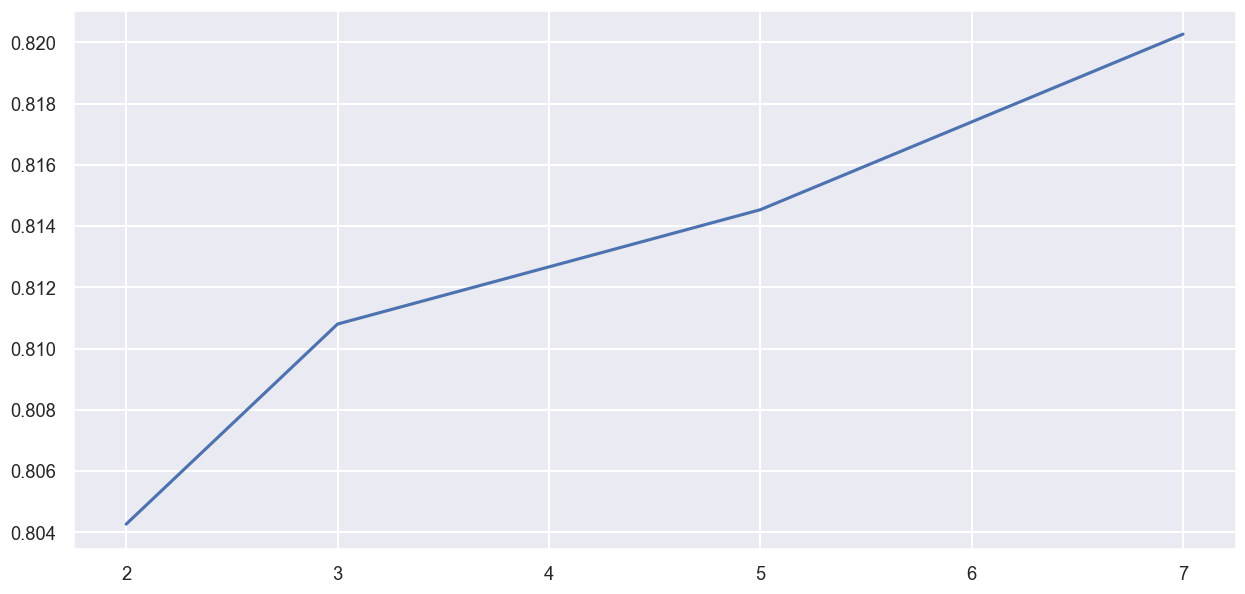

In [280]:
import matplotlib.pyplot as plt
x=[2,3,5,7]
plt.plot(x,acc,)

Accuracy Plot for Training data

In [281]:
acc1=[]

In [282]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, pred1)

train_pred1=model1.predict(x_train)
accuracy_train=accuracy_score(y_train,train_pred1)

In [283]:
accuracy_train

0.8025333333333333

In [284]:
acc1.append(accuracy_train)

In [285]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, pred2)

train_pred2=model2.predict(x_train)
accuracy_train=accuracy_score(y_train,train_pred2)
accuracy_train

0.8114666666666667

In [286]:
acc1.append(accuracy_train)

In [287]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, pred3)

train_pred3=model3.predict(x_train)
accuracy_train=accuracy_score(y_train,train_pred3)
accuracy_train

0.8176

In [288]:
acc1.append(accuracy_train)

In [289]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, pred4)

train_pred4=model4.predict(x_train)
accuracay_train=accuracy_score(y_train,train_pred4)
accuracy_train

0.8176

In [290]:
acc1.append(accuracy_train)

In [291]:
acc1

[0.8025333333333333, 0.8114666666666667, 0.8176, 0.8176]

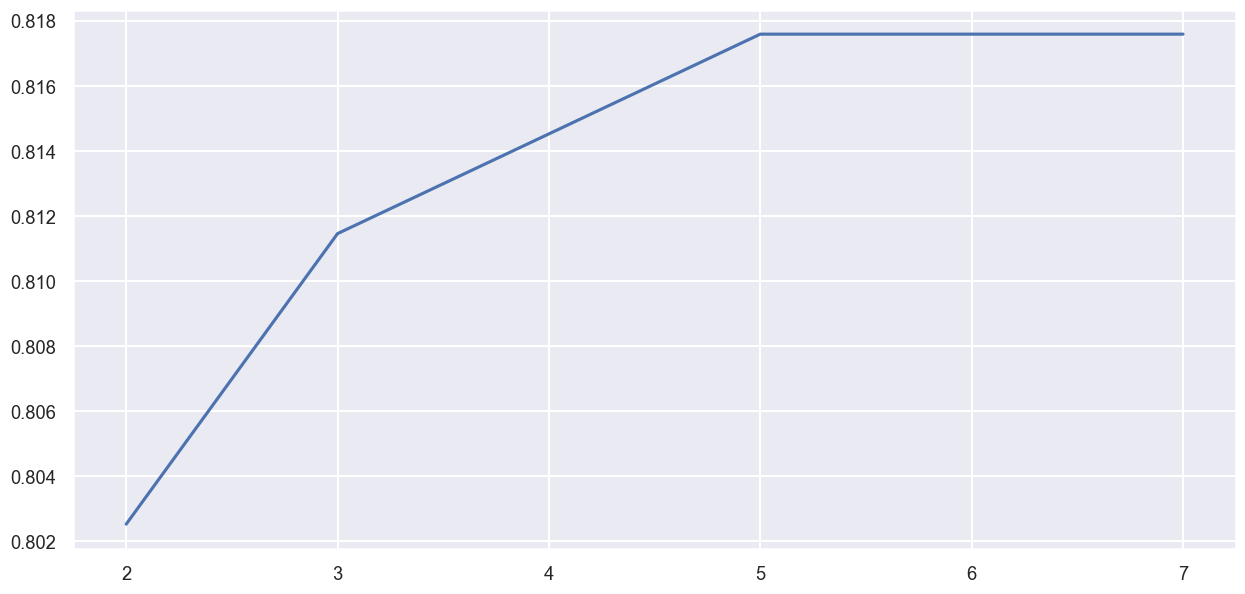

In [292]:
import matplotlib.pyplot as plt
x=[2,3,5,7]
plt.plot(x,acc1)

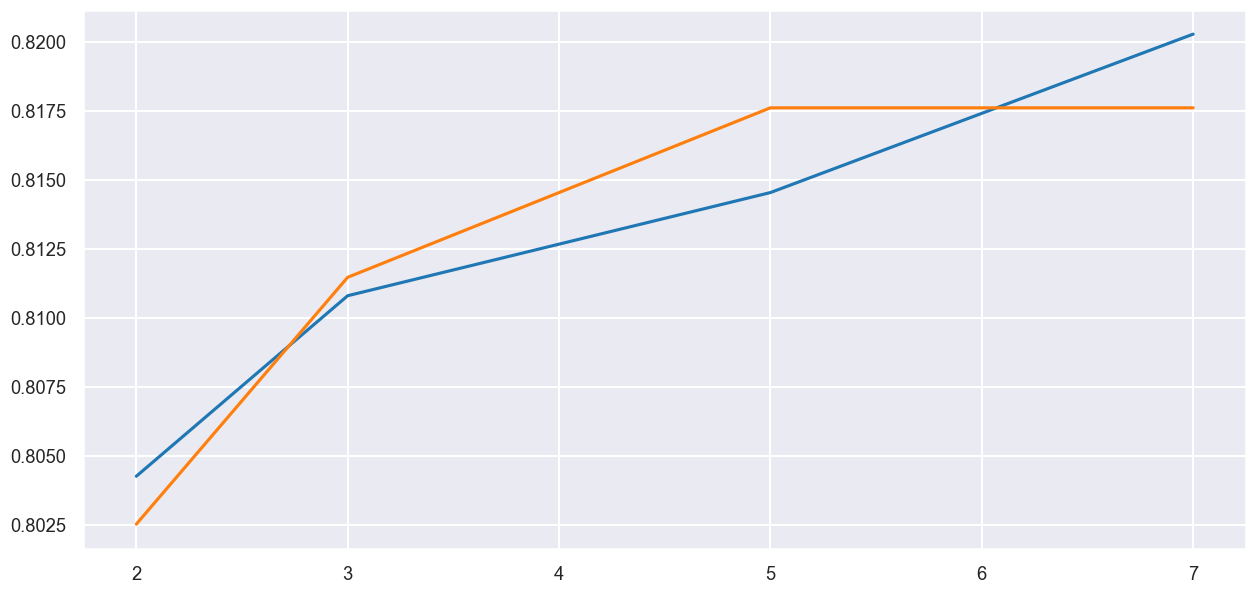

In [293]:
import matplotlib.pyplot as plt
x=[2,3,5,7]
plt.plot(x,acc,color='tab:blue')
plt.plot(x,acc1,color='tab:orange')

In [294]:
print('Training data:')
for i in range(0,4):
    print("Accuracy of model with max_depth:",x[i])
    print(acc1[i])
    

Training data:
Accuracy of model with max_depth: 2
0.8025333333333333
Accuracy of model with max_depth: 3
0.8114666666666667
Accuracy of model with max_depth: 5
0.8176
Accuracy of model with max_depth: 7
0.8176


In [295]:
print('Testing data:')
for i in range(0,4):
    print("Accuracy of model with max_depth:",x[i])
    print(acc[i])
    

Testing data:
Accuracy of model with max_depth: 2
0.8042666666666667
Accuracy of model with max_depth: 3
0.8108
Accuracy of model with max_depth: 5
0.8145333333333333
Accuracy of model with max_depth: 7
0.8202666666666667


In [296]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [297]:
#Model 1
from sklearn.metrics import accuracy_score,recall_score
from imblearn.metrics import specificity_score

y_pred=model1.predict(x_test)

accuracy1=accuracy_score(y_test,y_pred)
recall1=recall_score(y_test,y_pred)
specificity1=specificity_score(y_test,y_pred)

print('Accuracy1:',accuracy1)
print('Recall1:',recall1)
print('Specificity1:',specificity1)

Accuracy1: 0.8042666666666667
Recall1: 0.18131530424093423
Specificity1: 0.9768431806572451


In [298]:
#Model 2
from sklearn.metrics import accuracy_score,recall_score
from imblearn.metrics import specificity_score

y_pred=model2.predict(x_test)

accuracy2=accuracy_score(y_test,y_pred)
recall2=recall_score(y_test,y_pred)
specificity2=specificity_score(y_test,y_pred)

print('Accuracy2:',accuracy2)
print('Recall2:',recall2)
print('Specificity2:',specificity2)

Accuracy2: 0.8108
Recall2: 0.2464658881376767
Specificity2: 0.9671377490209433


In [299]:
#Model 3
from sklearn.metrics import accuracy_score,recall_score
from imblearn.metrics import specificity_score

y_pred=model3.predict(x_test)

accuracy3=accuracy_score(y_test,y_pred)
recall3=recall_score(y_test,y_pred)
specificity3=specificity_score(y_test,y_pred)

print('Accuracy3:',accuracy3)
print('Recall3:',recall3)
print('Specificity3:',specificity3)

Accuracy3: 0.8145333333333333
Recall3: 0.28518746158574065
Specificity3: 0.9611782734547931


In [300]:
#Model 4
from sklearn.metrics import accuracy_score,recall_score
from imblearn.metrics import specificity_score

y_pred=model4.predict(x_test)

accuracy4=accuracy_score(y_test,y_pred)
recall4=recall_score(y_test,y_pred)
specificity4=specificity_score(y_test,y_pred)

print('Accuracy4:',accuracy4)
print('Recall4:',recall4)
print('Specificity4:',specificity4)

Accuracy4: 0.8202666666666667
Recall4: 0.34787953288260604
Specificity4: 0.9511323003575686


Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'accuracy')

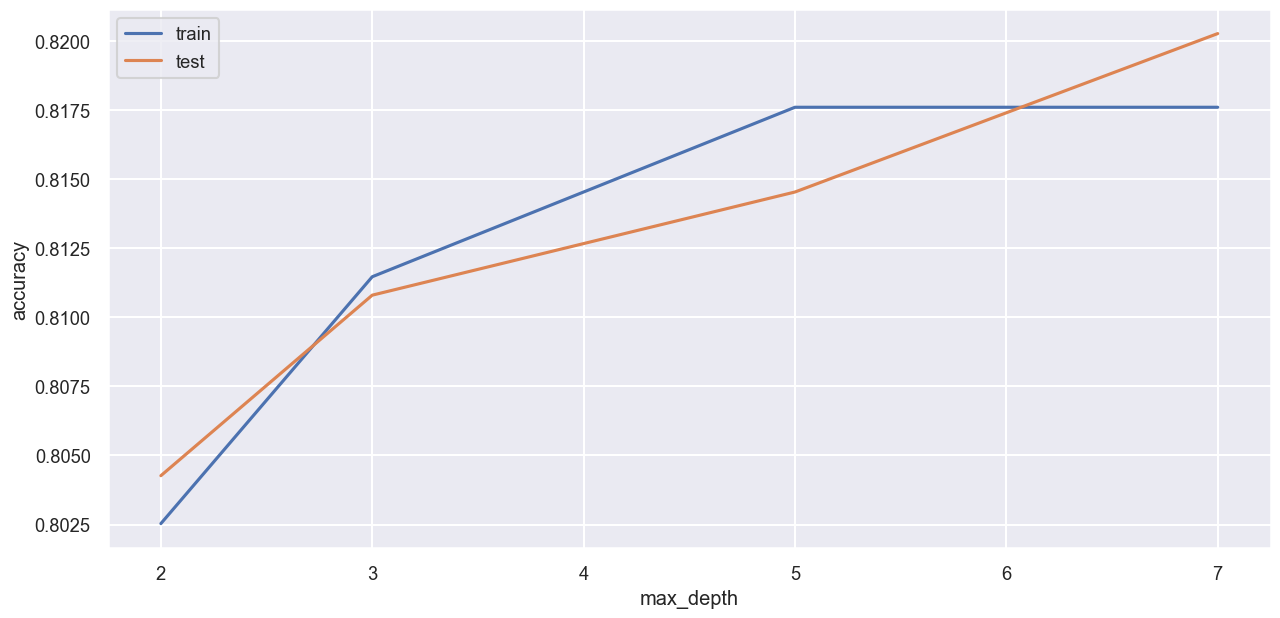

In [301]:
import matplotlib.pyplot as plt
max_depth=[2,3,5,7]
plt.plot(max_depth,acc1,label="train")
plt.plot(max_depth,acc,label="test")
plt.legend(loc="upper left")
plt.xlabel("max_depth")
plt.ylabel("accuracy")

# _Exploratory Data Analysis_

In [302]:
credit_data['defaulted']=target
credit_data.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Replacing the above integers with the values in the description 

In [303]:
credit_data.GENDER=credit_data.GENDER.replace(to_replace=[2,1],value=['female','male'])
credit_data.EDUCATION=credit_data.EDUCATION.replace(to_replace=[1,2,3,4],value=['graduate','universitry','high school','others'])
credit_data.MARRIAGE=credit_data.MARRIAGE.replace(to_replace=[1,2,3,0],value=['married','single','divorce','others'])
credit_data.defaulted=credit_data.defaulted.replace(to_replace=[1,0],value=['yes','no'])
credit_data.PAY_1=credit_data.PAY_1.replace(to_replace=[-2,-1,0,1,2,3,4,5,6,7,8],value=['no_consumption','paid_in_full','paid_minimum','p_d_1month','p_d_2months',
                                                                                       'p_d_3month','p_d_4month','p_d_5month','p_d_6month',
                                                                                        'p_d_7month','p_d_8month',])
credit_data.PAY_2=credit_data.PAY_2.replace(to_replace=[-2,-1,0,1,2,3,4,5,6,7,8],value=['no_consumption','paid_in_full','paid_minimum','p_d_1month','p_d_2months',
                                                                                       'p_d_3month','p_d_4month','p_d_5month','p_d_6month',
                                                                                        'p_d_7month','p_d_8month',])
credit_data.PAY_3=credit_data.PAY_3.replace(to_replace=[-2,-1,0,1,2,3,4,5,6,7,8],value=['no_consumption','paid_in_full','paid_minimum','p_d_1month','p_d_2months',
                                                                                       'p_d_3month','p_d_4month','p_d_5month','p_d_6month',
                                                                                        'p_d_7month','p_d_8month',])
credit_data.PAY_4=credit_data.PAY_4.replace(to_replace=[-2,-1,0,1,2,3,4,5,6,7,8],value=['no_consumption','paid_in_full','paid_minimum','p_d_1month','p_d_2months',
                                                                                       'p_d_3month','p_d_4month','p_d_5month','p_d_6month',
                                                                                        'p_d_7month','p_d_8month',])
credit_data.PAY_5=credit_data.PAY_5.replace(to_replace=[-2,-1,0,1,2,3,4,5,6,7,8],value=['no_consumption','paid_in_full','paid_minimum','p_d_1month','p_d_2months',
                                                                                       'p_d_3month','p_d_4month','p_d_5month','p_d_6month',
                                                                                        'p_d_7month','p_d_8month',])
credit_data.PAY_6=credit_data.PAY_6.replace(to_replace=[-2,-1,0,1,2,3,4,5,6,7,8],value=['no_consumption','paid_in_full','paid_minimum','p_d_1month','p_d_2months',
                                                                                       'p_d_3month','p_d_4month','p_d_5month','p_d_6month',
                                                                                        'p_d_7month','p_d_8month',])

In [304]:
credit_data.head(10)

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,20000,female,universitry,married,24,p_d_2months,p_d_2months,paid_in_full,paid_in_full,no_consumption,no_consumption,3913,3102,689,0,0,0,0,689,0,0,0,0,yes
1,120000,female,universitry,single,26,paid_in_full,p_d_2months,paid_minimum,paid_minimum,paid_minimum,p_d_2months,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,yes
2,90000,female,universitry,single,34,paid_minimum,paid_minimum,paid_minimum,paid_minimum,paid_minimum,paid_minimum,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,no
3,50000,female,universitry,married,37,paid_minimum,paid_minimum,paid_minimum,paid_minimum,paid_minimum,paid_minimum,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,no
4,50000,male,universitry,married,57,paid_in_full,paid_minimum,paid_in_full,paid_minimum,paid_minimum,paid_minimum,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,no
5,50000,male,graduate,single,37,paid_minimum,paid_minimum,paid_minimum,paid_minimum,paid_minimum,paid_minimum,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,no
6,500000,male,graduate,single,29,paid_minimum,paid_minimum,paid_minimum,paid_minimum,paid_minimum,paid_minimum,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,no
7,100000,female,universitry,single,23,paid_minimum,paid_in_full,paid_in_full,paid_minimum,paid_minimum,paid_in_full,11876,380,601,221,-159,567,380,601,0,581,1687,1542,no
8,140000,female,high school,married,28,paid_minimum,paid_minimum,p_d_2months,paid_minimum,paid_minimum,paid_minimum,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,no
9,20000,male,high school,single,35,no_consumption,no_consumption,no_consumption,no_consumption,paid_in_full,paid_in_full,0,0,0,0,13007,13912,0,0,0,13007,1122,0,no


In [305]:
credit_data.dtypes

LIMIT_BAL     int64
GENDER       object
EDUCATION    object
MARRIAGE     object
AGE           int64
PAY_1        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
defaulted    object
dtype: object

Extract categorical columns


1.Columns with 15 or less levels are considered as categorical columns for the purpose of this analysis

2.We have decided to treat all the columns with 15 or less levels as categorical columns, 
the following few lines of code extract all the columns which satisy the condition.

In [306]:
cat_cols = []

for i in credit_data.columns:
    if credit_data[i].dtype =='object' or len(np.unique(credit_data[i]))<=15 : # if the number of levels is less that 15 considering the column as categorial
        cat_cols.append(i)
        print("{} : {} : {} \n".format(i,len(np.unique(credit_data[i])),np.unique(credit_data[i])))

GENDER : 2 : ['female' 'male'] 

EDUCATION : 4 : ['graduate' 'high school' 'others' 'universitry'] 

MARRIAGE : 4 : ['divorce' 'married' 'others' 'single'] 

PAY_1 : 11 : ['no_consumption' 'p_d_1month' 'p_d_2months' 'p_d_3month' 'p_d_4month'
 'p_d_5month' 'p_d_6month' 'p_d_7month' 'p_d_8month' 'paid_in_full'
 'paid_minimum'] 

PAY_2 : 11 : ['no_consumption' 'p_d_1month' 'p_d_2months' 'p_d_3month' 'p_d_4month'
 'p_d_5month' 'p_d_6month' 'p_d_7month' 'p_d_8month' 'paid_in_full'
 'paid_minimum'] 

PAY_3 : 11 : ['no_consumption' 'p_d_1month' 'p_d_2months' 'p_d_3month' 'p_d_4month'
 'p_d_5month' 'p_d_6month' 'p_d_7month' 'p_d_8month' 'paid_in_full'
 'paid_minimum'] 

PAY_4 : 11 : ['no_consumption' 'p_d_1month' 'p_d_2months' 'p_d_3month' 'p_d_4month'
 'p_d_5month' 'p_d_6month' 'p_d_7month' 'p_d_8month' 'paid_in_full'
 'paid_minimum'] 

PAY_5 : 10 : ['no_consumption' 'p_d_2months' 'p_d_3month' 'p_d_4month' 'p_d_5month'
 'p_d_6month' 'p_d_7month' 'p_d_8month' 'paid_in_full' 'paid_minimum'] 

P

##### Print the categorical column names 

In [307]:
cat_cols

['GENDER',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'defaulted']

In [308]:
credit_data[cat_cols].dtypes

GENDER       object
EDUCATION    object
MARRIAGE     object
PAY_1        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
defaulted    object
dtype: object

Type conversion

- n dimensional type convesrion to 'category' is not implemented yet

In [309]:
for i in cat_cols:
    credit_data[i] = credit_data[i].astype('category')

In [310]:
credit_data[cat_cols].dtypes

GENDER       category
EDUCATION    category
MARRIAGE     category
PAY_1        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
defaulted    category
dtype: object

##### Extracting Numeric Columns

In [311]:
num_cols = [i for i in credit_data.columns if i not in cat_cols]

In [312]:
num_cols

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [313]:
credit_data.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,20000,female,universitry,married,24,p_d_2months,p_d_2months,paid_in_full,paid_in_full,no_consumption,no_consumption,3913,3102,689,0,0,0,0,689,0,0,0,0,yes
1,120000,female,universitry,single,26,paid_in_full,p_d_2months,paid_minimum,paid_minimum,paid_minimum,p_d_2months,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,yes
2,90000,female,universitry,single,34,paid_minimum,paid_minimum,paid_minimum,paid_minimum,paid_minimum,paid_minimum,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,no
3,50000,female,universitry,married,37,paid_minimum,paid_minimum,paid_minimum,paid_minimum,paid_minimum,paid_minimum,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,no
4,50000,male,universitry,married,57,paid_in_full,paid_minimum,paid_in_full,paid_minimum,paid_minimum,paid_minimum,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,no


##### Finding Correlation :

    If the correlation is close to 1, then the variables have a strong positive correlation. 
    
    If the correlation is close to -1, then the variables have a strong negative correlation.
    
    If the correlation is close to 0, then the variables have a weak or no correlation.

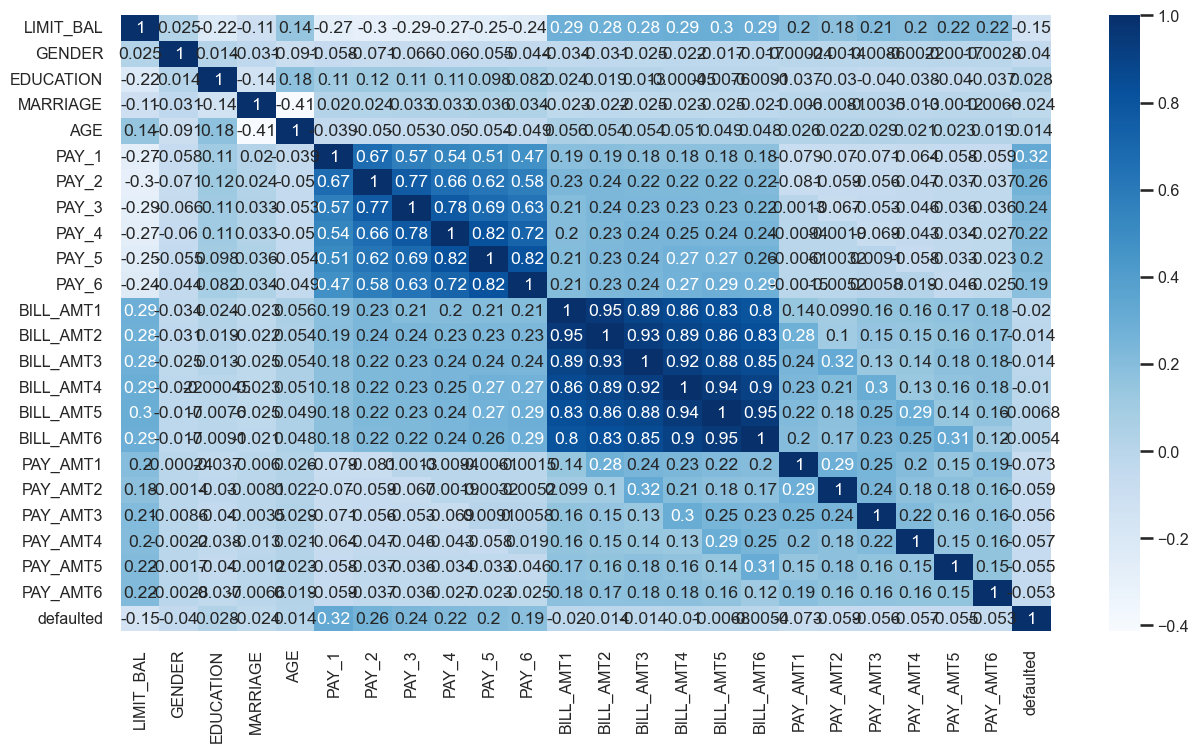

In [314]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(df.iloc[:,1:].corr(), cmap='Blues', annot=True);

# Univarite Analysis

1. What is the defaulted rate of credit card clients in Taiwan from April 2005 to September 2005?

In [353]:
temp=target.value_counts()

In [354]:
trace = go.Bar(x=temp.index,
               y= temp.values,
               text = temp.values,
               textposition = 'inside',
               name = 'Defaulted')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=400,
    height=600,
    title = "Defaulted Distribution"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [355]:
temp.values.sum()

np.int64(30000)

In [356]:
y= np.round(temp.values/temp.values.sum(),2)
y

array([0.78, 0.22])

In [357]:
trace = go.Bar(x=temp.index,
               y= np.round(temp.values/temp.values.sum(),2),
               text = np.round(temp.values/temp.values.sum(),2),
               textposition = 'inside',
               name = 'Defaulted')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=400,
    height=600,title = "Defaulted Distribution"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [358]:
# create a table with value counts
temp = target.value_counts()
# creating a Bar chart object of plotly
data = [go.Bar(
        x=temp.index.astype(str), # x axis values
        y=np.round(temp.values.astype(float)/temp.values.sum(),4)*100, # y axis values
        text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
    # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
        textposition = 'inside', # specify at which position on the bar the text should appear
    marker = dict(color = '#000000'),)] # change color of the bar
# color used here Black

# these are used to define the layout options

layout = go.Layout(
    autosize=False, # auto size the graph? use False if you are specifying the height and width
    width=800, # height of the figure in pixels
    height=600, # height of the figure in pixels
    title=dict(
        text="Distribution of {} column".format('defaulted'),
        font=dict(
            family='Courier New, monospace',
            size=10,
            color='green'
        )
    ),
    
    # granular control on the axes objects 
    xaxis=dict(title=dict(text='defaulted', font=dict(size=15,color="magenta")),
        
               tickfont=dict(
                   family='Courier New, monospace', # font family
                   size=20, # size of ticks displayed on the x axis
                   color='red'  # color of the font
        )
    ),
    yaxis=dict(
        title=dict(
            text='Percentage',
            font=dict(size=30, color='orange')
        ),
        tickfont=dict(
            family='Courier New, monospace',
            size=40,
            color='blue'
        )
    ),
 
    
    font = dict(
        family='Courier New, monospace', # font family
        color = "#FF00FF",# color of the font
        size = 60 # size of the font displayed on the bar
        )  
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

del temp

2. What is the Gender Distribution of credit card clients in Taiwan from April 2005 to September 2005??

In [321]:
temp = df.GENDER.value_counts()
temp                                 # 2-female , 1-male

GENDER
2    18112
1    11888
Name: count, dtype: int64

In [322]:
data = [go.Bar(
            x=temp.index,
            y= np.round(temp.values/temp.values.sum(),2),
            text = np.round(temp.values/temp.values.sum(),2),
            textposition = 'auto',
    )]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Gender Distribution",
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
del temp

In [323]:
# create a table with value counts
temp = df.GENDER.value_counts()

# creating a Bar chart object of plotly
data = [go.Bar(
    x=temp.index.astype(str),  # x axis values
    y=np.round(temp.values.astype(float) / temp.values.sum(), 4) * 100,  # y axis values
    text=['{}%'.format(i) for i in np.round(temp.values.astype(float) / temp.values.sum(), 4) * 100],
    textposition='inside',  # specify at which position on the bar the text should appear
    marker=dict(color='#000000')  # change color of the bar
)]

# layout options
layout = go.Layout(
    autosize=False,
    width=800,
    height=600,
    title=dict(
        text="Distribution of {} column".format('Gender'),
        font=dict(
            family='Courier New, monospace',
            size=10,
            color='green'
        )
    ),
    xaxis=dict(
        title=dict(text='Gender', font=dict(size=15, color="magenta")),
        tickfont=dict(
            family='Courier New, monospace',
            size=20,
            color='red'
        )
    ),
    yaxis=dict(
        title=dict(text='Percentage', font=dict(size=30, color='orange')),
        tickfont=dict(
            family='Courier New, monospace',
            size=40,
            color='blue'
        )
    ),
    font=dict(
        family='Courier New, monospace',
        color="#FF00FF",
        size=60
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

del temp


In [324]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title =dict(
            text="Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
            font=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' )# color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict(
            title=dict(
                text="Categories",
                font=dict(
                    size=14,
                    color='black'
                )
            ),
            tickfont=dict(  # Corrected tickfont
                family='Courier New, monospace',  # Font family
                size=14,  # Font size for x-axis ticks
                color='black'  # Font color
            )
        ),
       yaxis=dict(
            title=dict(
                text="Percentage",
                font=dict(
                    size=14,
                    color='black'
                )
            ),
            tickfont=dict(  # Corrected tickfont
                family='Courier New, monospace',  # Font family
                size=14,  # Font size for y-axis ticks
                color='black'  # Font color
            )
        ),
        font = dict(
            family='Courier New, monospace', # font family
            color = "white",# color of the font
            size = 12 # size of the font displayed on the bar
                )  
        )
    return layout_bar

In [325]:
def plot_bar1(col_name):
    # create a table with value counts
    temp = df[col_name].value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index, # x axis values
            y=np.round(temp.values/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values/temp.values.sum(),4)*100],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0047AB'),)] # change color of the bar
    # color used here Cobalt Blue
     
    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)
    

In [326]:
def plot_bar2(col_name):
    # create a table with value counts
    temp = target.value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index, # x axis values
            y=np.round(temp.values/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values/temp.values.sum(),4)*100],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0047AB'),)] # change color of the bar
    # color used here Cobalt Blue
     
    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)

In [327]:
plot_bar2('defaulted')

In [328]:
plot_bar1('GENDER')

3. What is the most common educational background of the credit card clients (Education)

In [329]:
plot_bar1('EDUCATION') 
# 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

4. What is the marital status of the credit card clients?

In [330]:
plot_bar1('MARRIAGE') 
# 1=married, 2=single, 3=others

5. Are the credit card clients in Taiwan young? (Age) 

In [331]:
plot_bar1('AGE')


Age is a continuous variable, it makes more sense to plot a histogram rather than a bar chart


In [332]:
data = [go.Histogram(x=df.AGE,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of Age")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

## Bivariate analysis

1. Is there any relationship between Defaulted and Gender?

In [333]:
Gender_Defaulted = credit_data.groupby(['GENDER','defaulted']).size().reset_index()
Gender_Defaulted.columns = ['GENDER','defaulted','Count']
Gender_Defaulted

C:\Users\UDAY\AppData\Local\Temp\ipykernel_9492\3220152796.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,GENDER,defaulted,Count
0,female,no,14349
1,female,yes,3763
2,male,no,9015
3,male,yes,2873


In [334]:
trace1 = go.Bar(x = Gender_Defaulted.GENDER[Gender_Defaulted.defaulted=='yes'],
               y = Gender_Defaulted.Count[Gender_Defaulted.defaulted=='yes'],
                text = Gender_Defaulted.Count[Gender_Defaulted.defaulted=='yes'],
                textposition = 'auto',
               name = 'yes',
               marker_color=px.colors.qualitative.Dark24[7])

trace2 = go.Bar(x = Gender_Defaulted.GENDER[Gender_Defaulted.defaulted=='no'],
               y = Gender_Defaulted.Count[Gender_Defaulted.defaulted=='no'],
                 text = Gender_Defaulted.Count[Gender_Defaulted.defaulted=='no'],
                textposition = 'auto',
               name = 'no',
               marker_color=px.colors.qualitative.Dark24[9])


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'Gender Vs Defaulted'
                  ,yaxis_title='default_count')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

##### Observation :

79% of Female are likely to pay next month

75% of Male are likely to pay next month

2. Is there any relationship b/w defaulted and education background

In [335]:
Education_Defaulted = credit_data.groupby(['EDUCATION','defaulted']).size().reset_index()
Education_Defaulted.columns = ['Education','defaulted','Count']
Education_Defaulted

C:\Users\UDAY\AppData\Local\Temp\ipykernel_9492\805244181.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Education,defaulted,Count
0,graduate,no,8549
1,graduate,yes,2036
2,high school,no,3680
3,high school,yes,1237
4,others,no,435
5,others,yes,33
6,universitry,no,10700
7,universitry,yes,3330


In [336]:
trace1 = go.Bar(x =Education_Defaulted.Education[Education_Defaulted.defaulted=='yes'],
               y = Education_Defaulted.Count[Education_Defaulted.defaulted=='yes'],
                text = Education_Defaulted.Count[Education_Defaulted.defaulted=='yes'],
                textposition = 'auto',
               name = 'yes'
                ,
               marker_color=px.colors.qualitative.Dark24[12])

trace2 = go.Bar(x = Education_Defaulted.Education[Education_Defaulted.defaulted=='no'],
               y = Education_Defaulted.Count[Education_Defaulted.defaulted=='no'],
                 text = Education_Defaulted.Count[Education_Defaulted.defaulted=='no'],
                textposition = 'auto',
               name = 'no',
               marker_color=px.colors.qualitative.Dark24[10])


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'Education Vs Defaulted',
                  yaxis_title='default_count'
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

##### Summary (Education Level vs. Default)

Although the Default Count for High School is lower than Graduate School & University. 

But in terms of Default Percentage, those with High School level have higher chance of Default.

3. Which people are more default?

In [337]:
df= pd.read_csv("credit-card-default.csv")

In [338]:
default0 = df.groupby(df['MARRIAGE'][df['defaulted'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['MARRIAGE'][df['defaulted'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('MARRIAGE').size().reset_index(name='TOTAL')

marriTable = default0.join(default1['DEFAULT']).join(total['TOTAL'])
marriTable['MARRIAGE'] = ['Others','Married','Single','Divorce']

marriTable

,MARRIAGE,NOT_DEFAULT,DEFAULT,TOTAL
0,Others,49,5,54
1,Married,10453,3206,13659
2,Single,12623,3341,15964
3,Divorce,239,84,323


In [339]:
marriTable['NOT_DEFAULT'] = round((default0['NOT_DEFAULT']/total['TOTAL'])*100,2)
marriTable['DEFAULT'] = round((default1['DEFAULT']/total['TOTAL'])*100,2)

marriPct = marriTable.iloc[:,0:3]
marriPct = marriPct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

marriPct

,MARRIAGE,NOT_DEFAULT(%),DEFAULT(%)
0,Others,90.74,9.26
1,Married,76.53,23.47
2,Single,79.07,20.93
3,Divorce,73.99,26.01


In [340]:
Marriage_Defaulted = credit_data.groupby(['MARRIAGE','defaulted']).size().reset_index()
Marriage_Defaulted.columns = ['Marriage','defaulted','Count']
Marriage_Defaulted

C:\Users\UDAY\AppData\Local\Temp\ipykernel_9492\1523745771.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Marriage,defaulted,Count
0,divorce,no,239
1,divorce,yes,84
2,married,no,10453
3,married,yes,3206
4,others,no,49
5,others,yes,5
6,single,no,12623
7,single,yes,3341


In [341]:
trace1 = go.Bar(x =Marriage_Defaulted.Marriage[Marriage_Defaulted.defaulted=='yes'],
               y = Marriage_Defaulted.Count[Marriage_Defaulted.defaulted=='yes'],
                text = Marriage_Defaulted.Count[Marriage_Defaulted.defaulted=='yes'],
                textposition = 'auto',
                name = 'yes',
               marker_color=px.colors.qualitative.Dark24[12])

trace2 = go.Bar(x = Marriage_Defaulted.Marriage[Marriage_Defaulted.defaulted=='no'],
               y = Marriage_Defaulted.Count[Marriage_Defaulted.defaulted=='no'],
                 text = Marriage_Defaulted.Count[Marriage_Defaulted.defaulted=='no'],
                textposition = 'auto',
               name = 'no',
               marker_color=px.colors.qualitative.Dark24[10])


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'Married Vs Defaulted',
                  
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

##### Summary (Marital Status vs. Default)


Although the Default Count for Divorce is lower than Single & Married.

But in terms of Default Percentage, those who Divorce have higher chance of Default.

In [342]:
from IPython.core.display import display,HTML
display(HTML('<style>.container {width:95% !important}</style>'))

C:\Users\UDAY\AppData\Local\Temp\ipykernel_9492\4143586975.py:1: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display



In [343]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Explore Credit Behaviour

Now we explore PAY_1. As information in the heatmap, PAY_1 is the higest positive correlated variable with target variable.

PAY_1: Repayment status in September, 2005 (most recent month)

(-2 = No consumption, -1 = paid in full, 0 = paid minimum only , 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

In [344]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [345]:
df=df.rename(columns={'PAY_0':'PAY_1'})
df=df.rename(columns={'SEX':'GENDER'})

C:\Users\UDAY\AppData\Local\Temp\ipykernel_9492\4039371569.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, 'No Consumption'),
 Text(0, 1, 'Paid in Full'),
 Text(0, 2, 'paid minimum only '),
 Text(0, 3, 'Delay 1 mth'),
 Text(0, 4, 'Delay 2 mths'),
 Text(0, 5, 'Delay 3 mths'),
 Text(0, 6, 'Delay 4 mths'),
 Text(0, 7, 'Delay 5 mths'),
 Text(0, 8, 'Delay 6 mths'),
 Text(0, 9, 'Delay 7 mths'),
 Text(0, 10, 'Delay 8 mths')]

Text(0.5, 1.0, 'Credit Behaviour (most recent month)')

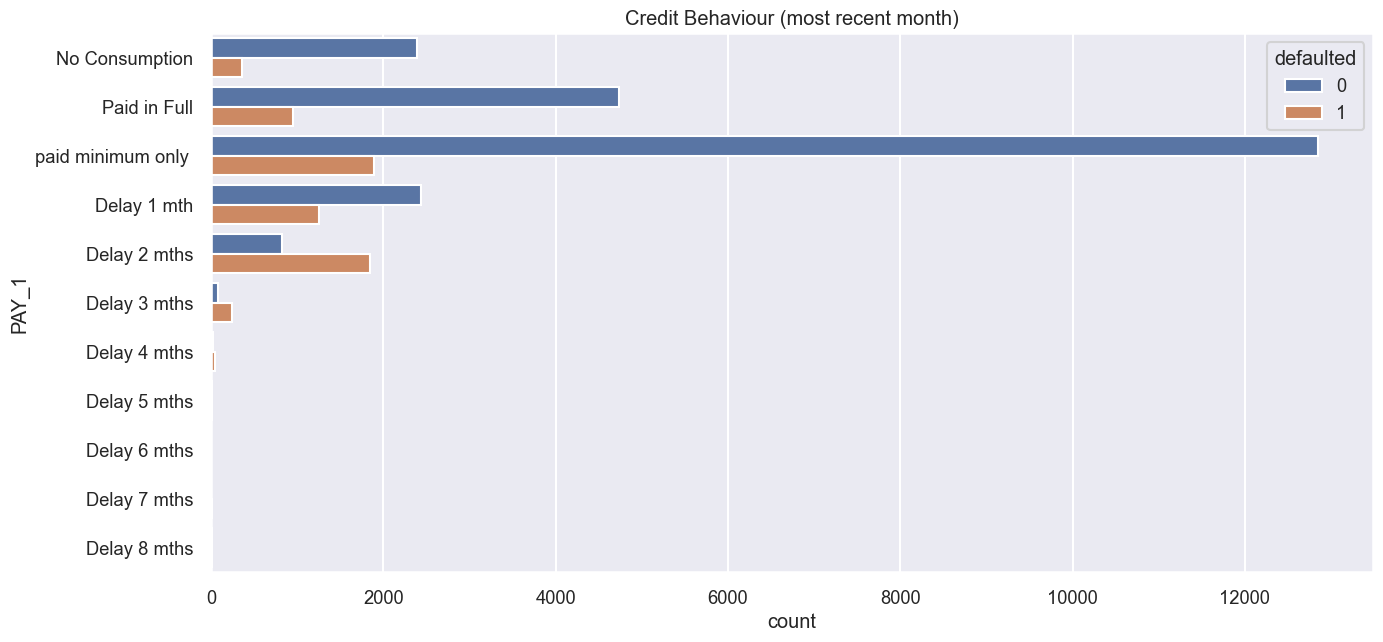

In [346]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)

pay1 = sns.countplot(y="PAY_1", hue='defaulted', data=df)
pay1.set_yticklabels(['No Consumption','Paid in Full','paid minimum only ','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Credit Behaviour (most recent month)')

plt.show()

In [347]:
default0 = df.groupby(df['PAY_1'][df['defaulted'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['PAY_1'][df['defaulted'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('PAY_1').size().reset_index(name='TOTAL')

pay1Table = default0.join(default1['DEFAULT']).join(total['TOTAL'])
pay1Table['PAY_1'] = ['No Consumption','Paid in Full','Paid minimum only','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths']

pay1Table

,PAY_1,NOT_DEFAULT,DEFAULT,TOTAL
0,No Consumption,2394,365,2759
1,Paid in Full,4732,954,5686
2,Paid minimum only,12849,1888,14737
3,Delay 1 mth,2436,1252,3688
4,Delay 2 mths,823,1844,2667
5,Delay 3 mths,78,244,322
6,Delay 4 mths,24,52,76
7,Delay 5 mths,13,13,26
8,Delay 6 mths,5,6,11
9,Delay 7 mths,2,7,9


##### Summary (Credit Behaviour vs. Default)

Those Using Revolving Credit (paid only minimum) and those delayed for 2 months have the highest Default Count.

When payment is delayed more than 2 months, the chances of default goes higher than 50%.

In [348]:
credit_data.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Is a particular age group are more default? (Age and Default)


In [349]:
credit_data.AGE[credit_data.defaulted=='yes'].describe()

count    6636.000000
mean       35.725738
std         9.693438
min        21.000000
25%        28.000000
50%        34.000000
75%        42.000000
max        75.000000
Name: AGE, dtype: float64

In [350]:
credit_data.AGE[credit_data.defaulted=='no'].describe()

count    23364.000000
mean        35.417266
std          9.077355
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [351]:
table = pd.crosstab(credit_data['AGE'],credit_data['defaulted'])
table

defaulted,no,yes
AGE,,
21,53,14
22,391,169
23,684,247
24,827,300
25,884,302
26,1003,253
27,1164,313
28,1123,286
29,1292,313


In [352]:
trace1 = go.Box(y = credit_data.AGE[credit_data.defaulted=='yes'],name = 'Yes')
trace2 = go.Box(y = credit_data.AGE[credit_data.defaulted=='no'],name= 'No')

data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Age and Defaulted')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

#You can also bin the age column and do the same